## REFL Assignment 1
Vinodh Chincholi, MDS202252

Question 1(i) Gradient Ascent for 687 gridworld problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
## This class specifies the environment (S, A, p, dR, d0, gamma)

class gridWorld:
    def __init__(self):
        
        ## the state space is tuple (i,j) excluding (2,2) (3,2)
        self.S = [(i,j) for i in range(5) for j in range(5) 
                  if not((i==2 and j==2) or (i==3 and j==2))]
        
        ## the set of actions are up, down, left, right
        ## these can be conviniently written as tuples which when added to state s 
        ## return the new state. Actions in order up, down, left, right (& stay at s)
        self.A = {'u':(-1,0), 'd':(1,0), 'l':(0,-1), 'r':(0,1), 's':(0,0)}
        
        ## The initial state for each episode is constant
        self.s = (0,0)
        
        ## Decay parameter as defined
        self.gamma = 0.9
        
        self.reward = 0
        
        
    def getNewState(self, a):
        
        oldState = self.s
        
        ## Sample action according to 0.8, 0.05, 0.05, 0.1 rule given in question
        if a in ['u', 'd']:
            a = np.random.choice([a, 'l', 'r', 's'], 1, [0.8, 0.05, 0.05, 0.1])[0]
        elif a in ['l', 'r']:
            a = np.random.choice([a, 'u', 'd', 's'], 1, [0.8, 0.05, 0.05, 0.1])[0]
        
        ## Convert from string action to tuple
        a = self.A[a]
        
        ## Take the action a
        candState = tuple(map(sum, zip(self.s, a)))
        
        ## Return same state if a is taking agent out of gridWorld
        if candState not in self.S:
            # print(f'Cannot go {candState} from {oldState}')
            self.reward = 0
            return
        
        ## Else return new state
        self.s = candState
        
        ## Once the move is made, update rewards
        if self.s == (4,2):
            self.reward = -10

        elif self.s == (4,4):
            self.reward = 10
            
        else:
            self.reward = 0
        
        # print(f'{oldState} --> {self.s}\n Reward: {self.reward}')
        return

In [3]:
# states = [(i,j) for i in range(5) for j in range(5) 
#           if not((i==2 and j==2) or (i==3 and j==2))]

states = [(i,j) for i in range(5) for j in range(5)]

s2idx = dict([(tup,5*tup[0]+tup[1]) for tup in states])
idx2s = dict([(s2idx[i],i) for i in s2idx])

lookup = dict([(i,s2idx[i]) for i in s2idx] + 
                [(j,idx2s[j]) for j in idx2s])

In [4]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [5]:
action_lookup = {0:'u', 1:'d', 2:'l', 3:'r'}

In [6]:
def eval_policy(theta, tot_eps):
    policy = np.reshape(theta, (25,4))
    G_list = []
    
    for _ in range(tot_eps):
        agent = gridWorld()
        state = agent.s
        moves = 0
        converge = True
        
        terminal = False
        G = 0
        while not(terminal):

            state_idx = lookup[state]
            probs = softmax(policy[state_idx])
            action = np.argmax(probs)
            action = action_lookup[action]
            
            agent.getNewState(action)
            G = agent.reward + agent.gamma*G
            state = agent.s
            moves += 1
            
            if state == (4,4):
                terminal = True
                
            if moves > 10000:
                break
            
        G_list.append(G)
    
    return(np.mean(G_list), np.std(G_list))

In [7]:
N = 50
SIGMA = 1

theta = np.random.normal(0, SIGMA, 25*4)
policy = np.reshape(theta, (25,4))
G_list = []

In [8]:
for i in range(300):
    G = eval_policy(theta, N)
    candTheta = np.random.normal(theta, SIGMA)
    candG = eval_policy(candTheta, N)
    print(f'{i+1} cand: {candG[0]} best: {G[0]}', end='\r')
    if candG[0] > G[0]:
        theta = candTheta.copy()
        G = candG
    G_list.append(candG)

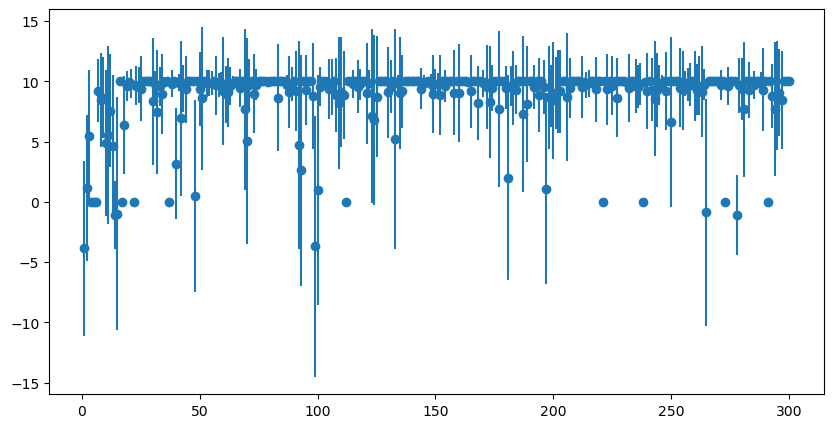

In [9]:
trial = [j+1 for j in range(len(G_list))]
mean, std = [tup[0] for tup in G_list], [tup[1] for tup in G_list]

fig = plt.figure(figsize=(10,5))
plt.errorbar(x=trial, y=mean,
             yerr=std, fmt='o')
plt.show()

In [10]:
policy = np.reshape(theta, (25,4))

In [11]:
policy = [np.argmax(softmax(policy[i])) for i in range(25)]
policy = [action_lookup[i] for i in policy]

In [12]:
table = np.array(['a' for j in range(25)])
table = np.reshape(table, (5,5))

In [13]:
for i in range(25):
    tup = lookup[i]
    table[tup] = policy[i]
    
table[2,2], table[3,2], table[4,4] = '_', '_', '_'

In [14]:
policy = np.reshape(theta, (25,4))

In [15]:
table

array([['d', 'u', 'd', 'r', 'r'],
       ['d', 'l', 'd', 'd', 'l'],
       ['l', 'd', '_', 'd', 'd'],
       ['l', 'r', '_', 'u', 'r'],
       ['l', 'l', 'u', 'l', '_']], dtype='<U1')